# **Loading Dataset**

In [ ]:
# Loading Data...........

import pandas as pd
df = pd.read_csv("Rice-Gonen andJasmine.csv")
print(df.head())

   id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation    Class  
0      76.004525  0.657536    273.085   0.764510      1.440796  jasmine  
1      60.471018  0.713009    208.317   0.831658      1.453137  jasmine  
2      62.296341  0.759153    210.012   0.868434      1.465950  jasmine  
3      62.551300  0.783529    210.657   0.870203      1.483456  jasmine  
4      68.571668  0.769375    230.332   0.874743      1.510000  jasmine  


In [ ]:
# Dataset Info......
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  object 
dtypes: float64(8), int64(3), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn import preprocessing

In [ ]:
# Convert target label to binary...........

le = preprocessing.LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# **Feature Selection**

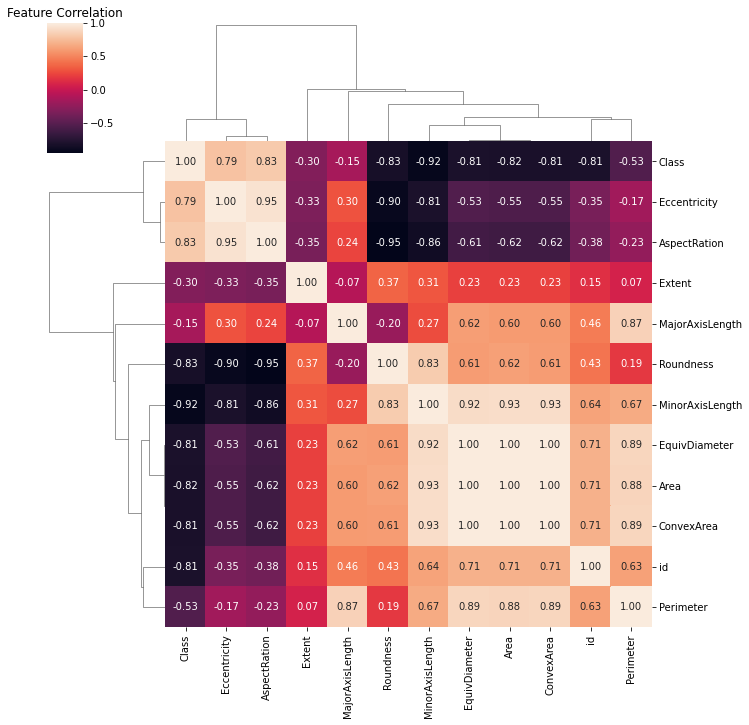

In [ ]:
# Correlation Matrix........

import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = '.2f')
plt.title("Feature Correlation")
plt.show() 

In [ ]:
y = df['Class']

In [ ]:
df = df.drop(['Class'], axis = 1)

In [ ]:
# Dropping highly correlated features/ redundant features........

df = df.drop(['AspectRation'], axis = 1)


In [ ]:
# Dropping least correlated features/ redundant features........

X = df.drop(['id'], axis = 1)

# Dataset Split

In [ ]:
# Splitting Dataset for evaluation.........

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Training**

In [ ]:
# Building modelwith two hidden layers..........

import tensorflow as tf

from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(9,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [ ]:
# Fetching shape of splitted data.........

print("Shape of training data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)
print("Shape of training label: ",y_train.shape)
print("Shape of test label: ", y_test.shape)


Shape of training data:  (14548, 9)
Shape of test data:  (3637, 9)
Shape of training label:  (14548,)
Shape of test label:  (3637,)


In [ ]:
# Fit model and find loss........ 

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, batch_size=256)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/30
57/57 [==============================] - 1s 2ms/step - loss: 0.5664 - accuracy: 0.6617
Epoch 2/30
57/57 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9725
Epoch 3/30
57/57 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.9840
Epoch 4/30
57/57 [==============================] - 0s 1ms/step - loss: 0.0596 - accuracy: 0.9869
Epoch 5/30
57/57 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9882
Epoch 6/30
57/57 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9889
Epoch 7/30
57/57 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9889
Epoch 8/30
57/57 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9893
Epoch 9/30
57/57 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9896
Epoch 10/30
57/57 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9896
Epoch 11/30
57/57 [

# Prediction

In [ ]:
# Prediction.........

print(model.predict(X_test))

[[3.2858381e-06]
 [7.7355139e-08]
 [8.7337743e-05]
 ...
 [9.9995637e-01]
 [9.9822921e-01]
 [2.3519794e-07]]


# **Comparison with other models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train,y_train)
yrf_pred = rf_model.predict(X_test)
accuracy_score(yrf_pred,y_test)

0.987627165246082

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train,y_train)
ynn_pred = knn_model.predict(X_test)
accuracy_score(ynn_pred,y_test)

0.9859774539455596

In [ ]:
from sklearn import svm
clf = svm.SVC()
svm_model = clf.fit(X_train,y_train)
ysvm_pred = svm_model.predict(X_test)
accuracy_score(ysvm_pred,y_test)

0.9881770690129228